In [12]:
#######################################################################
# Loading packages
#######################################################################
using MatrixNetworks
using Distributions
using Clustering
using NPZ
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using Printf
using LinearAlgebra
using Plots
#######################################################################
# Loading functions
#######################################################################
include("Algo/SphereEmbedCluster.jl")


SDP_Cluster (generic function with 1 method)

In [13]:
#######################################################################
# Loading data for the first call (used for compilation
#######################################################################
community0 = readdlm("Data/LFR_NMI/precompile.nmc"); # communities: .nmc
adj = readdlm("Data/LFR_NMI/precompile.nse"); # network: *.nse

# remove first line (infos) and third column (weights)
adj = adj[2:end,1:2]
adj = convert(Array{Float64,2},adj)

community_true = community0[:,2];
N = length(community_true);
n_edge2 = size(adj)[1];

A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N);
A = A+A' # Only the upper triangular part of A was stored
A,_ = largest_component(A);
adj = 0;

#######################################################################
# First call to compile the functions
#######################################################################
print("------------ First Run for Compilation ------------- \n")

n_it_PPM = 2;
t = 1e-06;
n_clusters = 2;
n_it_Vec_Partition = 3;
shape = "Ellipsoidal"; #shape = "Spherical"
r0 = 20;

n_updates = 1;
sig,community =  SphereEmbedCluster(A,n_it_PPM,t, n_clusters,n_it_Vec_Partition,n_updates,shape,r0);

	print("\n------------ DONE: TEST OK ------------- \n")
#######################################################################

------------ First Run for Compilation ------------- 



 ------- Acc Projected Power Iteration -------
The iteration did not converge after 2 iterations
The relative difference between the last objective values 0.076626 
  0.000356 seconds (84 allocations: 333.344 KiB)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 1
Number of communities: 2
Modularity: 0.06225515088449525
 -------------------------------------------- 
The squared singular values divided by N : 
[0.3158067837547597, 0.2557622645969855, 0.09806381262093612, 0.05853210577720124, 0.03499919777964027, 0.03152488440624221, 0.030102417298989406, 0.025657950641741298, 0.02357159637576553, 0.020363016763067274, 0.01811179417489245, 0.015493779701438013, 0.014582706319880043, 0.013511469574426359, 0.012366901969165886, 0.008929951265675641, 0.007894403868394234, 0.0060360789629457, 0.005391329972914543, 0.0032975541749375673]

------------ DONE: TEST OK ------------- 



========== Graph 1/10, mu=0.1, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 456 iterations
  0.659371 seconds (11.90 k allocations: 634.161 MiB, 13.06% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 5
Number of communities: 16
Modularity: 0.8280406076362496
 -------------------------------------------- 
The squared singular values divided by N : 
[0.4241966544392915, 0.2495376633919508, 0.16446888845644425, 0.09764463067785184, 0.0638527384760303, 0.00021188069847846925, 7.910064259184093e-5, 3.876452512763764e-6, 2.1976372062962904e-6, 8.263718745849314e-7, 6.331716406235943e-7, 4.838773881978081e-7, 1.942049688930456e-7, 1.37006126203001e-7, 6.290605137893154e-8, 1.619425136332603e-8, 8.370098652908795e-9, 5.096740975387077e-9, 1.855103860257144e-9, 7.339760644553134e-11]
  0.709804 seconds (129.12 k allocations: 675.921 MiB, 12.90% gc time)

========== Graph 1/10, mu=0.1, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The 

  0.536892 seconds (9.78 k allocations: 519.947 MiB, 12.76% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 1
Number of communities: 17
Modularity: 0.823320178040456
 -------------------------------------------- 
The squared singular values divided by N : 
[0.4233938571348207, 0.24892369735230147, 0.16568557229849917, 0.09995248818260347, 0.06182898897595719, 0.00012871184489236017, 7.46980496895432e-5, 4.5206090599102355e-6, 4.399405178642676e-6, 1.0807458005334078e-6, 7.212250104811954e-7, 5.368723676746663e-7, 3.28814071947091e-7, 2.3044305487248145e-7, 1.1406274285709945e-7, 2.971364914059177e-8, 1.1123193273796057e-8, 7.247549719929129e-9, 5.672065658578759e-9, 2.2749161934393176e-10]
  0.575518 seconds (89.69 k allocations: 548.462 MiB, 13.04% gc time)

========== Graph 1/10, mu=0.1, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 447 iterations


  0.611828 seconds (11.67 k allocations: 621.631 MiB, 12.34% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 2
Number of communities: 16
Modularity: 0.831322576464135
 -------------------------------------------- 
The squared singular values divided by N : 
[0.4236647959793265, 0.24906363520903982, 0.16534755337638868, 0.09801297431995001, 0.06370487576344824, 0.0001573758232054783, 3.435791534196013e-5, 9.770798229984139e-6, 2.1522328444818894e-6, 1.4075180220841834e-6, 4.1050227515460784e-7, 3.1851476958153613e-7, 1.920503443023709e-7, 9.375977547081666e-8, 5.9260877122180957e-8, 1.565018748217683e-8, 8.43680666747909e-9, 1.4201380169481642e-9, 9.783757549012337e-10, 4.906535883213036e-10]
  0.654731 seconds (114.37 k allocations: 658.112 MiB, 12.36% gc time)

========== Graph 2/10, mu=0.2, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 336 iteration

  0.458648 seconds (8.79 k allocations: 467.012 MiB, 12.21% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 18
Modularity: 0.7373272929012651
 -------------------------------------------- 
The squared singular values divided by N : 
[0.34504737254256, 0.2992836939250294, 0.1927438004826914, 0.10506936746295623, 0.039775243721895205, 0.01804860979338713, 1.9442633972474345e-5, 5.244440775504747e-6, 3.5552876032004153e-6, 1.962988598770979e-6, 9.222100593096729e-7, 4.7102683787274227e-7, 1.778101719796012e-7, 5.855442779572311e-8, 3.4212101694721625e-8, 2.5768478002503958e-8, 1.0458855678980892e-8, 4.157857185693169e-9, 1.780655326851611e-9, 7.410853315070812e-10]
  0.507301 seconds (115.67 k allocations: 505.146 MiB, 12.30% gc time)

========== Graph 2/10, mu=0.2, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 262 iterations


  0.356890 seconds (6.86 k allocations: 363.933 MiB, 11.68% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 2
Number of communities: 16
Modularity: 0.7261358360849431
 -------------------------------------------- 
The squared singular values divided by N : 
[0.3436995518183704, 0.2985315523150331, 0.1935437122781345, 0.10642050679770435, 0.03862767540013241, 0.018971123019491845, 0.00015992151669236117, 2.3957925435452287e-5, 9.043874188746393e-6, 4.568950868211015e-6, 3.3524211614726553e-6, 2.794011161952351e-6, 1.4654983530153928e-6, 4.371665336948763e-7, 2.558900557876517e-7, 5.8424722103171994e-8, 1.1960864587194874e-8, 7.115188050263246e-9, 2.779476225145617e-9, 8.364322891551774e-10]
  0.399014 seconds (99.23 k allocations: 396.972 MiB, 11.89% gc time)

========== Graph 2/10, mu=0.2, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 260 iterations


  0.373653 seconds (6.81 k allocations: 361.147 MiB, 11.34% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 17
Modularity: 0.7287633403567024
 -------------------------------------------- 
The squared singular values divided by N : 
[0.3430553127062014, 0.29884409061681905, 0.192194973299284, 0.1061884040869867, 0.03893366751414897, 0.020642677453188377, 7.911559403328096e-5, 3.8453012614917546e-5, 1.1123935454362308e-5, 6.268822496727126e-6, 3.399906436061958e-6, 1.1838100499368946e-6, 6.924133742464275e-7, 3.0933854296275723e-7, 1.518990939272948e-7, 9.475572066562225e-8, 4.382848744499649e-8, 2.3189647089501033e-8, 1.1948329631549611e-8, 1.86909029495417e-9]
  0.425147 seconds (109.54 k allocations: 397.783 MiB, 11.66% gc time)

========== Graph 3/10, mu=0.3, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 265 iterations


  0.359139 seconds (6.94 k allocations: 368.112 MiB, 12.19% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 6
Number of communities: 15
Modularity: 0.6408030194182597
 -------------------------------------------- 
The squared singular values divided by N : 
[0.23759206637796593, 0.20427624782793566, 0.16232338115170378, 0.13663342036809137, 0.10831881291660854, 0.07556479580235065, 0.04430430717743645, 0.030813023422063917, 9.018394164619984e-5, 6.678692604023148e-5, 7.768259566258643e-6, 5.461493231487269e-6, 1.6549052663957322e-6, 9.069708026830668e-7, 7.199086002368738e-7, 2.848614982289005e-7, 8.36504152009109e-8, 6.034494409773533e-8, 2.1192136937877978e-8, 1.2501695267266068e-8]
  0.424046 seconds (138.70 k allocations: 414.929 MiB, 11.77% gc time)

========== Graph 3/10, mu=0.3, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 305 iterations


  0.413286 seconds (7.98 k allocations: 423.830 MiB, 12.36% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 2
Number of communities: 16
Modularity: 0.6292377303267941
 -------------------------------------------- 
The squared singular values divided by N : 
[0.23781253093013036, 0.20444684249202424, 0.16207643521229234, 0.1364691611168037, 0.10772054165835399, 0.0755476453371699, 0.04518654880166374, 0.03064525724178122, 7.459109345351396e-5, 1.3483939859914841e-5, 3.043583952688463e-6, 2.034053515113407e-6, 1.1818409734171406e-6, 4.978366380762504e-7, 1.428141517110104e-7, 3.469231481118363e-8, 1.2853292441679717e-8, 9.875794270216342e-9, 3.5464515158833264e-9, 1.0793834566197866e-9]
  0.463518 seconds (94.12 k allocations: 454.552 MiB, 13.01% gc time)

========== Graph 3/10, mu=0.3, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 403 iterations


  0.550143 seconds (10.53 k allocations: 560.340 MiB, 12.46% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 15
Modularity: 0.6348416496231991
 -------------------------------------------- 
The squared singular values divided by N : 
[0.23775356613142512, 0.20443931613179622, 0.16196700992273888, 0.13667504065994265, 0.10803867915435263, 0.07569340923651645, 0.044820629910849306, 0.030581857172365924, 2.441112085981595e-5, 4.067906152358651e-6, 1.4202588736885713e-6, 3.225219192307492e-7, 1.987708565749534e-7, 3.9939702290698826e-8, 2.3816084183255985e-8, 4.8775770461776736e-9, 1.3875462771298628e-9, 6.735652784345844e-10, 3.866434163929472e-10, 2.0232719724673195e-11]
  0.611287 seconds (133.96 k allocations: 603.959 MiB, 12.54% gc time)

========== Graph 4/10, mu=0.4, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 214 iterati

  0.309715 seconds (5.61 k allocations: 297.071 MiB, 11.70% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 15
Modularity: 0.5272301057021508
 -------------------------------------------- 
The squared singular values divided by N : 
[0.24757782176478924, 0.207864625831024, 0.17363959442439, 0.1306907303522176, 0.11107785505673475, 0.08523871411717078, 0.04381141144927719, 3.6464816455923074e-5, 2.8671000404287024e-5, 1.460362683851537e-5, 8.650191373146124e-6, 5.184425951621593e-6, 4.011551015249814e-6, 7.410180275742876e-7, 5.269795761145506e-7, 1.6938318275164685e-7, 1.5401176118698625e-7, 4.309282939257165e-8, 2.5013599459825384e-8, 1.893381234100969e-9]
  0.363513 seconds (116.62 k allocations: 336.492 MiB, 11.68% gc time)

========== Graph 4/10, mu=0.4, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 355 iterations


  0.495345 seconds (9.28 k allocations: 493.479 MiB, 12.44% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 4
Number of communities: 17
Modularity: 0.5496645449892555
 -------------------------------------------- 
The squared singular values divided by N : 
[0.24737309451442585, 0.20769248339097113, 0.17355990834680815, 0.130077499588566, 0.11035632646184994, 0.08481398431469289, 0.04610762398395901, 1.2211105167681925e-5, 3.384910822533107e-6, 1.1403516274958155e-6, 1.025362600747864e-6, 7.11851337221499e-7, 5.002060272834612e-7, 6.766868708650566e-8, 1.94183460167244e-8, 8.031228185983e-9, 5.212035367408224e-9, 4.4697690071886235e-9, 6.037500405333671e-10, 2.0732863192650193e-10]
  0.574709 seconds (151.38 k allocations: 543.930 MiB, 12.14% gc time)

========== Graph 4/10, mu=0.4, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 258 iterations


  0.352251 seconds (6.76 k allocations: 358.361 MiB, 12.79% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 14
Modularity: 0.5350620047194987
 -------------------------------------------- 
The squared singular values divided by N : 
[0.24716614283187655, 0.2077835120198301, 0.17395971734673005, 0.13009901609698746, 0.10967243565562318, 0.08415707834219355, 0.047015052229922756, 8.984258204035723e-5, 3.8050195119742496e-5, 1.0169497150647344e-5, 3.971808461045577e-6, 2.8351571202002037e-6, 9.965880096214972e-7, 5.151953430140438e-7, 3.493459033086655e-7, 2.402813531285643e-7, 6.034639964087435e-8, 1.1144201323769455e-8, 2.3755086811473182e-9, 9.602253858227834e-10]
  0.404156 seconds (113.62 k allocations: 396.336 MiB, 12.60% gc time)

========== Graph 5/10, mu=0.5, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 314 iterations


  0.431844 seconds (8.21 k allocations: 436.367 MiB, 12.21% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 8
Number of communities: 13
Modularity: 0.446365947944872
 -------------------------------------------- 
The squared singular values divided by N : 
[0.2344102383835559, 0.2092975761955891, 0.1625070948223537, 0.12715436140598824, 0.09254386177104848, 0.07105993987269418, 0.05766976413736279, 0.03886373224006473, 0.0064604463652682565, 2.147284200918285e-5, 6.9634169523951466e-6, 2.3751435012412812e-6, 1.0876486432288835e-6, 6.576660510406451e-7, 2.7254934873184394e-7, 1.0024485647430814e-7, 3.1113519823583686e-8, 1.301425932020664e-8, 9.917319154591983e-9, 1.2496143878097921e-9]
  0.512933 seconds (179.32 k allocations: 496.770 MiB, 11.49% gc time)

========== Graph 5/10, mu=0.5, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 324 iterations


  0.438815 seconds (8.47 k allocations: 450.297 MiB, 12.03% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 8
Number of communities: 14
Modularity: 0.444166893607648
 -------------------------------------------- 
The squared singular values divided by N : 
[0.23436700910128042, 0.20921222723601646, 0.1624577310382745, 0.12717190369586964, 0.09253999657407173, 0.07118536252921003, 0.057713710599709346, 0.039044536040970496, 0.006271276747450049, 2.3053224878409382e-5, 6.865160965939527e-6, 2.841166918069322e-6, 1.8067382681367203e-6, 9.347057990600368e-7, 4.2259928342816815e-7, 2.5023409369686434e-7, 4.8754514989560434e-8, 1.6791048476176856e-8, 6.686909592693734e-9, 3.744674094905326e-10]
  0.516190 seconds (146.43 k allocations: 499.275 MiB, 11.76% gc time)

========== Graph 5/10, mu=0.5, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 251 iterations


  0.343595 seconds (6.58 k allocations: 348.611 MiB, 12.88% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 4
Number of communities: 18
Modularity: 0.4432355791238485
 -------------------------------------------- 
The squared singular values divided by N : 
[0.23421882923325507, 0.20905328816142169, 0.16254035006565845, 0.1272792686007503, 0.09229598978178497, 0.0714408236680505, 0.05771967279299553, 0.039117244214147896, 0.006264854446824369, 4.077739688601987e-5, 1.7236720492766935e-5, 9.046304595619551e-6, 1.4069316160810834e-6, 6.025808403474242e-7, 3.595162152732476e-7, 1.41561399115712e-7, 6.262225783961309e-8, 2.636105588498355e-8, 1.136902418218986e-8, 7.670727885050973e-9]
  0.422244 seconds (161.11 k allocations: 403.324 MiB, 11.97% gc time)

========== Graph 6/10, mu=0.6, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 348 iterations


  0.479128 seconds (9.10 k allocations: 483.728 MiB, 11.57% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 5
Number of communities: 14
Modularity: 0.3358164532067087
 -------------------------------------------- 
The squared singular values divided by N : 
[0.219501876623358, 0.15981299986551295, 0.1534600915458996, 0.11968392172376534, 0.10412460636518, 0.08015293479265263, 0.06755838511035897, 0.04580674824153583, 0.03615490321183079, 0.01062288898660336, 0.003111559820133359, 7.471786708641981e-6, 1.3021791742585511e-6, 1.7003316254361442e-7, 6.12026653891848e-8, 3.9655591870187665e-8, 2.752854192376532e-8, 6.869395472440881e-9, 3.0470454876743045e-9, 1.4108839587034226e-9]
  0.566914 seconds (171.94 k allocations: 541.075 MiB, 11.07% gc time)

========== Graph 6/10, mu=0.6, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 345 iterations


  0.472756 seconds (9.02 k allocations: 479.549 MiB, 12.87% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

11
Number of communities: 14
Modularity: 0.3387111988253619
 -------------------------------------------- 
The squared singular values divided by N : 
[0.2195093495351941, 0.15984766565212363, 0.15340534061789854, 0.11971185775198688, 0.10415486387972099, 0.08002186305517925, 0.0675813658486396, 0.045957309484579635, 0.036244985379184386, 0.01065155483180941, 0.0029079713509081256, 3.6484414216072505e-6, 1.658061574368326e-6, 2.498741173164891e-7, 1.9752931967547475e-7, 5.5232714575084665e-8, 4.8134625434960104e-8, 8.475763977748837e-9, 3.977771494445169e-9, 2.885467102453995e-9]
  0.585476 seconds (219.56 k allocations: 553.443 MiB, 11.90% gc time)

========== Graph 6/10, mu=0.6, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 314 iterations


  0.447954 seconds (8.21 k allocations: 436.364 MiB, 12.54% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

7
Number of communities: 15
Modularity: 0.33972326568972916
 -------------------------------------------- 
The squared singular values divided by N : 
[0.21953888395246787, 0.15988714943973653, 0.15341094526442062, 0.11966562999913181, 0.10403836724889669, 0.08035744114766066, 0.06754200801765443, 0.04598027161906616, 0.03635185670217338, 0.010282673949350816, 0.0029192340136662814, 1.5225567884622794e-5, 7.048594711364273e-6, 2.2571441314979284e-6, 5.257239898265779e-7, 3.3953516920569595e-7, 9.015411407303e-8, 3.58673692228355e-8, 1.3383015199723692e-8, 2.6753897687905493e-9]
  0.557687 seconds (229.09 k allocations: 513.467 MiB, 11.53% gc time)

========== Graph 7/10, mu=0.7, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 315 iterations


  0.469042 seconds (8.24 k allocations: 437.757 MiB, 11.79% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 3
Number of communities: 15
Modularity: 0.22927901227816672
 -------------------------------------------- 
The squared singular values divided by N : 
[0.19477684634796255, 0.15870145968082014, 0.1384289849031662, 0.12296219089535693, 0.10918912736963488, 0.09671543979257957, 0.06668963648239093, 0.04676467787413689, 0.036880432177459704, 0.022144660382581626, 0.0067094094398784465, 2.5435736745400425e-5, 7.930172981983904e-6, 2.04554187390352e-6, 9.561426671428065e-7, 5.618161184234936e-7, 1.0988984057330151e-7, 5.585263945456836e-8, 3.068207856503712e-8, 8.819086515615337e-9]
  0.530945 seconds (115.13 k allocations: 476.233 MiB, 11.78% gc time)

========== Graph 7/10, mu=0.7, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 299 iterations


  0.440652 seconds (7.82 k allocations: 415.473 MiB, 11.39% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

11
Number of communities: 9
Modularity: 0.24236179496063492
 -------------------------------------------- 
The squared singular values divided by N : 
[0.19466145999537676, 0.1586984538016045, 0.13830537073529578, 0.12307307678374213, 0.10912918083017378, 0.0966833893258365, 0.06672629084890827, 0.04677447187551417, 0.03695705316725088, 0.02225537849048204, 0.006691748154203496, 3.407129605817303e-5, 4.594865550753047e-6, 2.75957245598585e-6, 1.5339921972791287e-6, 5.856591781790737e-7, 2.9716777801054577e-7, 1.6266366370841013e-7, 1.0502315370534629e-7, 1.5751575345133277e-8]
  0.549170 seconds (189.10 k allocations: 478.967 MiB, 10.81% gc time)

========== Graph 7/10, mu=0.7, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 314 iterations


  0.467675 seconds (8.21 k allocations: 436.364 MiB, 11.90% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 6
Number of communities: 9
Modularity: 0.23427853439863414
 -------------------------------------------- 
The squared singular values divided by N : 
[0.1947082592220839, 0.15862128630586994, 0.13832916622152464, 0.12304193385084601, 0.10918070051358164, 0.09665153141379354, 0.06666255320651612, 0.046816930662794014, 0.037081966985633166, 0.022186018713313573, 0.006681428254668113, 2.319514997486405e-5, 9.769058097141646e-6, 2.3771324728689623e-6, 1.7437157968931722e-6, 7.083649645798858e-7, 2.496520040652546e-7, 1.2656600869921723e-7, 3.1391848203720555e-8, 2.3618207541891922e-8]
  0.557130 seconds (162.69 k allocations: 491.165 MiB, 11.45% gc time)

========== Graph 8/10, mu=0.8, number_rep = 1 ==========



 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 289 iterations


  0.411654 seconds (7.56 k allocations: 401.537 MiB, 12.38% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

16
Number of communities: 6
Modularity: 0.21170863480249905
 -------------------------------------------- 
The squared singular values divided by N : 
[0.19407303920501173, 0.16216553674386125, 0.12910376090376915, 0.10771127168265018, 0.09333984785623096, 0.08137624390942184, 0.06279601040666265, 0.055939248568523024, 0.047908679285834734, 0.03910529692764971, 0.019328418469638446, 0.007100564973175961, 2.969096866456131e-5, 1.2375035169317024e-5, 5.696292228653308e-6, 1.5690789620320183e-6, 1.3897552658503445e-6, 7.898754521879974e-7, 3.729481041862239e-7, 1.9711372317715954e-7]
  0.523151 seconds (211.53 k allocations: 472.012 MiB, 11.33% gc time)

========== Graph 8/10, mu=0.8, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 473 iterations


  0.690413 seconds (12.35 k allocations: 657.844 MiB, 12.26% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

14
Number of communities: 6
Modularity: 0.2144309996193449
 -------------------------------------------- 
The squared singular values divided by N : 
[0.1941309946910359, 0.1621591235209798, 0.12924187323128156, 0.10774409752673883, 0.09348931246501577, 0.08136808395001538, 0.06274709580033404, 0.05597624880978829, 0.04763152657546767, 0.039144752038515467, 0.019026646869410316, 0.007335073254762765, 3.236860604846793e-6, 7.753404263598801e-7, 7.510973816739247e-7, 2.079417718190917e-7, 1.0360321782348985e-7, 5.459567871691385e-8, 2.5346352509429802e-8, 1.6481220396540083e-8]
  0.803303 seconds (210.14 k allocations: 726.300 MiB, 11.68% gc time)

========== Graph 8/10, mu=0.8, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 455 iterations


  0.664751 seconds (11.88 k allocations: 632.771 MiB, 12.51% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

8
Number of communities: 7
Modularity: 0.21294152259942317
 -------------------------------------------- 
The squared singular values divided by N : 
[0.19407891369150979, 0.1621750486453678, 0.12917756618786616, 0.10776236052281839, 0.09344328114919766, 0.08131541550078637, 0.06269067706976168, 0.055948496522007576, 0.04763137068123242, 0.03919820757740871, 0.019076970831637747, 0.007497046305736539, 2.337266162849135e-6, 1.2447773672123398e-6, 6.36015577720979e-7, 2.571305165355511e-7, 1.0463052665220771e-7, 4.499200893259674e-8, 1.7468732806306607e-8, 3.0337766508778694e-9]
  0.775429 seconds (222.01 k allocations: 705.468 MiB, 11.42% gc time)

========== Graph 9/10, mu=0.9, number_rep = 1 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 298 iterations


  0.432179 seconds (7.80 k allocations: 414.076 MiB, 11.64% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

8
Number of communities: 8
Modularity: 0.20776686082532078
 -------------------------------------------- 
The squared singular values divided by N : 
[0.17495459998872057, 0.15250762014302435, 0.13262160682942314, 0.110945815477118, 0.09738084705455143, 0.0860444525570953, 0.07510090959776113, 0.05504159836754889, 0.05407426563515955, 0.033468714946964455, 0.0272327658150772, 0.0006126590553844995, 9.321643642191404e-6, 1.805564457281611e-6, 1.5947049637674202e-6, 7.913413421492759e-7, 2.9248748424717684e-7, 1.7645282449444817e-7, 1.0774007497944422e-7, 5.459738282051207e-8]
  0.548334 seconds (217.92 k allocations: 486.785 MiB, 10.97% gc time)

========== Graph 9/10, mu=0.9, number_rep = 2 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 251 iterations


  0.377545 seconds (6.58 k allocations: 348.608 MiB, 10.97% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

8
Number of communities: 7
Modularity: 0.2070050736485491
 -------------------------------------------- 
The squared singular values divided by N : 
[0.1749018038792472, 0.15261712222426363, 0.13270899614975123, 0.11087709112921945, 0.0973194700541189, 0.08603881067007642, 0.07500041898767845, 0.055047455164839026, 0.054113105751532144, 0.033782926410672126, 0.02710187770510121, 0.0003728947661946228, 6.949407826203293e-5, 3.0741798232412877e-5, 7.3835098101455765e-6, 4.3511015457952925e-6, 3.5792196706938534e-6, 1.3496826652543344e-6, 9.337201309654515e-7, 1.939969878807507e-7]
  0.492003 seconds (187.93 k allocations: 412.125 MiB, 10.14% gc time)

========== Graph 9/10, mu=0.9, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 299 iterations


  0.442428 seconds (7.82 k allocations: 415.469 MiB, 12.03% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 6
Number of communities: 7
Modularity: 0.20610390590597233
 -------------------------------------------- 
The squared singular values divided by N : 
[0.17498024936015671, 0.15243967223474134, 0.13261584202534712, 0.1108278822683504, 0.09728943153604791, 0.0860553973352088, 0.07504724875589522, 0.05511705946728562, 0.053949157712354354, 0.03368211018546198, 0.027004793667433507, 0.000974312277413904, 7.887813679065773e-6, 3.5799704966793252e-6, 2.484754170256113e-6, 1.2256561360600668e-6, 1.1131447207096124e-6, 3.5943677053156715e-7, 1.3497823797373057e-7, 5.742009138320447e-8]
  0.538990 seconds (176.69 k allocations: 474.655 MiB, 11.18% gc time)

========== Graph 10/10, mu=1.0, number_rep = 1 ==========



 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 299 iterations


  0.443285 seconds (7.82 k allocations: 415.466 MiB, 12.28% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 6
Number of communities: 9
Modularity: 0.21863193632121408
 -------------------------------------------- 
The squared singular values divided by N : 
[0.17038797690816765, 0.14210237865235748, 0.13108940498086735, 0.11264862590797423, 0.0961114860757427, 0.07855694252252877, 0.07287537131542757, 0.05735048417323582, 0.048051029222494504, 0.04383053541297189, 0.027162525569344353, 0.014680819986540328, 0.005035238984727993, 9.707537565419009e-5, 1.2223461883863855e-5, 4.717021202215224e-6, 2.3613431262711934e-6, 4.3906223233739123e-7, 3.0719719017620664e-7, 5.6826329932665256e-8]
  0.531411 seconds (176.75 k allocations: 474.447 MiB, 10.25% gc time)

========== Graph 10/10, mu=1.0, number_rep = 2 ==========



 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 310 iterations


  0.440513 seconds (8.11 k allocations: 430.789 MiB, 11.97% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

11
Number of communities: 7
Modularity: 0.2169344283511149
 -------------------------------------------- 
The squared singular values divided by N : 
[0.17030222657492058, 0.14211978238295223, 0.13107658190211038, 0.11262719424245353, 0.09607510671047446, 0.0783566985314215, 0.07297224499956227, 0.057378737401499964, 0.04789630320416756, 0.04360578606416487, 0.027680301543780032, 0.014844033149445782, 0.004906344484041307, 0.00014798973519180707, 6.920756481119857e-6, 2.2409982440059396e-6, 7.419938011989191e-7, 4.088290417021321e-7, 2.707786372540632e-7, 8.571760759199365e-8]
  0.553615 seconds (216.20 k allocations: 502.513 MiB, 10.97% gc time)

========== Graph 10/10, mu=1.0, number_rep = 3 ==========

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 298 iterations


  0.462228 seconds (7.80 k allocations: 414.076 MiB, 12.05% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

9
Number of communities: 9
Modularity: 0.21809732177332
 -------------------------------------------- 
The squared singular values divided by N : 
[0.1703408874861712, 0.14203491390547623, 0.1309508743178656, 0.11266729844497335, 0.09620283415059096, 0.07842879476491132, 0.07294513883325364, 0.05760066588442258, 0.04805465921912041, 0.04379733136121832, 0.027038722930310944, 0.01459821843243917, 0.005073454478895058, 0.0002538696377129166, 7.320840256189695e-6, 3.037199332135792e-6, 1.2852135616082026e-6, 4.087069806262906e-7, 1.7679836913419975e-7, 1.0739413921772884e-7]
  0.585182 seconds (234.48 k allocations: 492.278 MiB, 10.41% gc time)


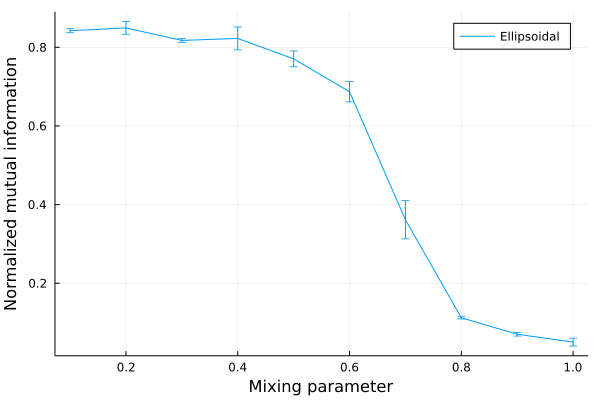

In [14]:
#######################################################################
# Compute NMI for each graph
#######################################################################

# Set parameters of simulations
mus=0.1:0.1:1 # values for the mixing parameter

n_it_PPM = 30000;
t = 1e-10;
n_clusters = 20;
r0 = 20;

# Specify here the number of times vector partition is repeated
n_it_Vec_Partition = 10;
# we advise : n_it_Vec_Partition = 100;

n_updates = 100; # max total by default
shape = "Ellipsoidal"; #shape = "Spherical"

n_rep = 3;
NMIs=zeros(Float64,length(mus),n_rep)
for i=1:length(mus)
    for j=1:n_rep
        println("\n========== Graph $i/$(length(mus)), mu=$(mus[i]), number_rep = $j ==========")
        # load graph data
        community0 = readdlm("Data/LFR_NMI/data"*string(mus[i])*".nmc"); # communities: .nmc
        adj = readdlm("Data/LFR_NMI/data"*string(mus[i])*".nse"); # network: *.nse
        
        # remove first line (infos) and third column (weights)
        adj = adj[2:end,1:2]
        adj = convert(Array{Float64,2},adj)

        community_true = convert(Array{Int64},community0[:,2])
        N = length(community_true);
        n_edge2 = size(adj)[1];

        A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N);
        A = A+A' # Only the upper triangular part of A was stored

        A,vertices = largest_component(A);
        community_true=community_true[vertices]
        community_true=Reorder(community_true)

        # solve
        ~,community = @time SphereEmbedCluster(A,n_it_PPM,t, n_clusters,n_it_Vec_Partition,n_updates,shape,r0)

        # compute NMI
        NMIs[i,j]=mutualinfo(community_true,community);
    end
end
#######################################################################
# Plot Normalized mutual information vs Miwing parameter
#######################################################################
m = mean(NMIs,dims=2);
s = std(NMIs,dims=2);
plot(mus, m, yerror = s,
markerstrokecolor=:auto,
xlabel = "Mixing parameter",
ylabel = "Normalized mutual information",
labels = "Ellipsoidal")
#######################################################################

